# Credit Card customers

## The task

Predict which customer is going to churn.

## The dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
plt.style.use('ggplot')

from scipy import stats
from scipy.stats import norm


from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

import math
import warnings
warnings.filterwarnings('ignore')

In [3]:
input_df = pd.read_csv('data/BankChurners.csv')
display(input_df.shape)
display(input_df.sample(5))

(10127, 23)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
118,721074183,Existing Customer,49,M,1,Doctorate,Married,$60K - $80K,Blue,36,...,24159.0,1196,22963.0,0.712,1111,24,1.000,0.050,0.000324,0.99968
5427,712242633,Existing Customer,42,F,2,Unknown,Single,Less than $40K,Blue,36,...,2677.0,2517,160.0,0.609,3911,76,0.810,0.940,0.000174,0.99983
8681,787226508,Existing Customer,47,M,2,College,Single,$60K - $80K,Blue,41,...,20811.0,1302,19509.0,0.793,7192,82,0.708,0.063,0.000294,0.99971
9225,716406483,Existing Customer,30,M,0,Unknown,Single,$60K - $80K,Blue,20,...,23760.0,1349,22411.0,0.961,13124,103,0.746,0.057,0.000285,0.99971
5995,710476908,Existing Customer,39,F,3,Graduate,Married,Unknown,Blue,28,...,9371.0,1066,8305.0,0.890,4754,78,0.857,0.114,0.000314,0.99969


We will drop some useless columns

In [4]:
input_df.drop('CLIENTNUM', axis=1, inplace=True)

input_df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], 
          inplace=True, axis=1)

input_df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
          inplace=True, axis=1)

display(input_df.shape)

(10127, 20)

In [5]:
display(input_df.columns)

display(input_df.info())

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

None

### Missing values

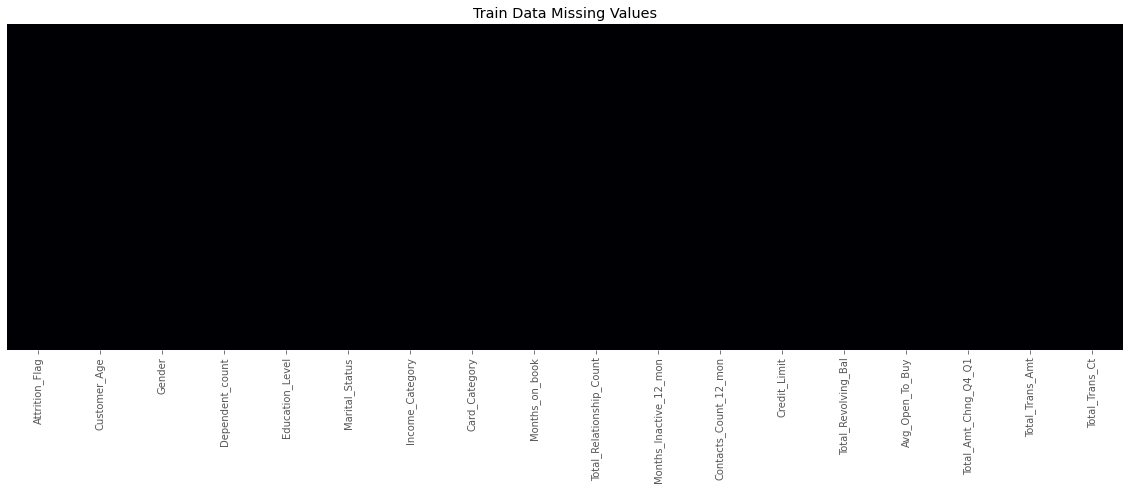

In [6]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Train Data Missing Values')
plt.xticks(rotation=90)

sns.heatmap(input_df.iloc[:,:-2].isnull(),
            yticklabels=False,
            cbar=False,
            cmap='magma',
            ax=ax)

plt.show()

`df.info` and plot above suggest that there are no missing values in the dataset. However, we will inquire this topic later.

### What does Y look like?

Existing Customer  - 83.93%
Attrited Customer  - 16.07%


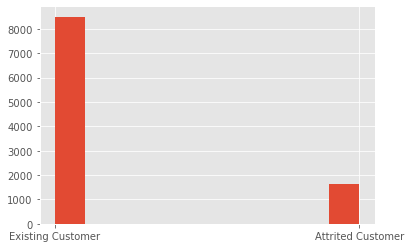

In [7]:
input_df['Attrition_Flag'].hist()
input_df['Attrition_Flag'].describe(include='all')
print('Existing Customer  - {}%' .format(100 * round(len(input_df[input_df['Attrition_Flag'] == 'Existing Customer'])/len(input_df),4)))
print('Attrited Customer  - {}%' .format(100 *round(len(input_df[input_df['Attrition_Flag'] == 'Attrited Customer'])/len(input_df),4)))

Majority of observations describe existing customers. This may cause problems in moder fitting.

### Categorical variables in the set

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


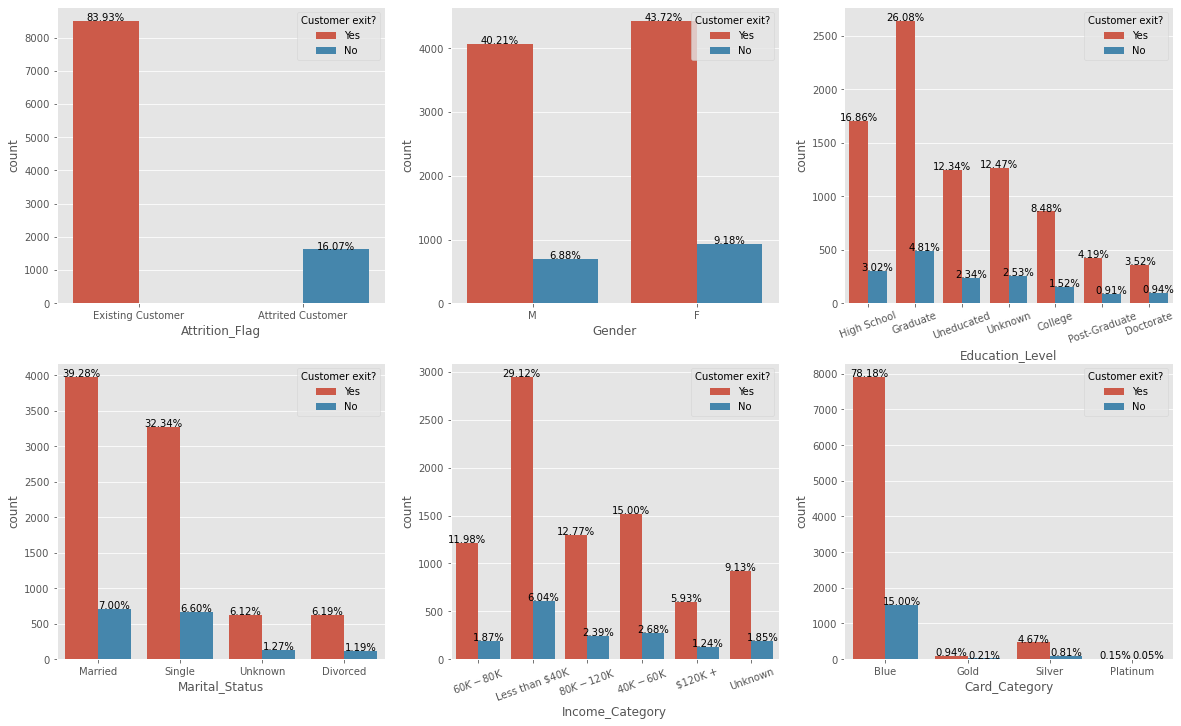

In [9]:
cats = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

def pltCountplotHueTarget(cats, target):
    
    fig, axis = plt.subplots(len(cats) // 3,3, figsize=(20,12))  

    index = 0
    for i in range(len(cats) // 3):
        for j in range(3):
            
            ax = sns.countplot(cats[index], data=input_df, hue=target, ax=axis[i][j])
            
            ax.legend(title='Customer exit?',
                      loc='upper right',
                      labels=['Yes', 'No'])
            
            if cats[index] in ['Education_Level', 'Income_Category']:
                for item in ax.get_xticklabels():
                    item.set_rotation(20)
                
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(input_df)*100),
                        ha="center") 
            index += 1
            
            
pltCountplotHueTarget(cats, 'Attrition_Flag')

Note that `Education_Level`, `Income_Category` and `Marital_Status` can be classified as Unknown. Formally it's not a `null` value, but it is still some lack in the knowledge. We've decided to create flag variable for missing data and replace missing values with mode.

### Numerical variables in the set

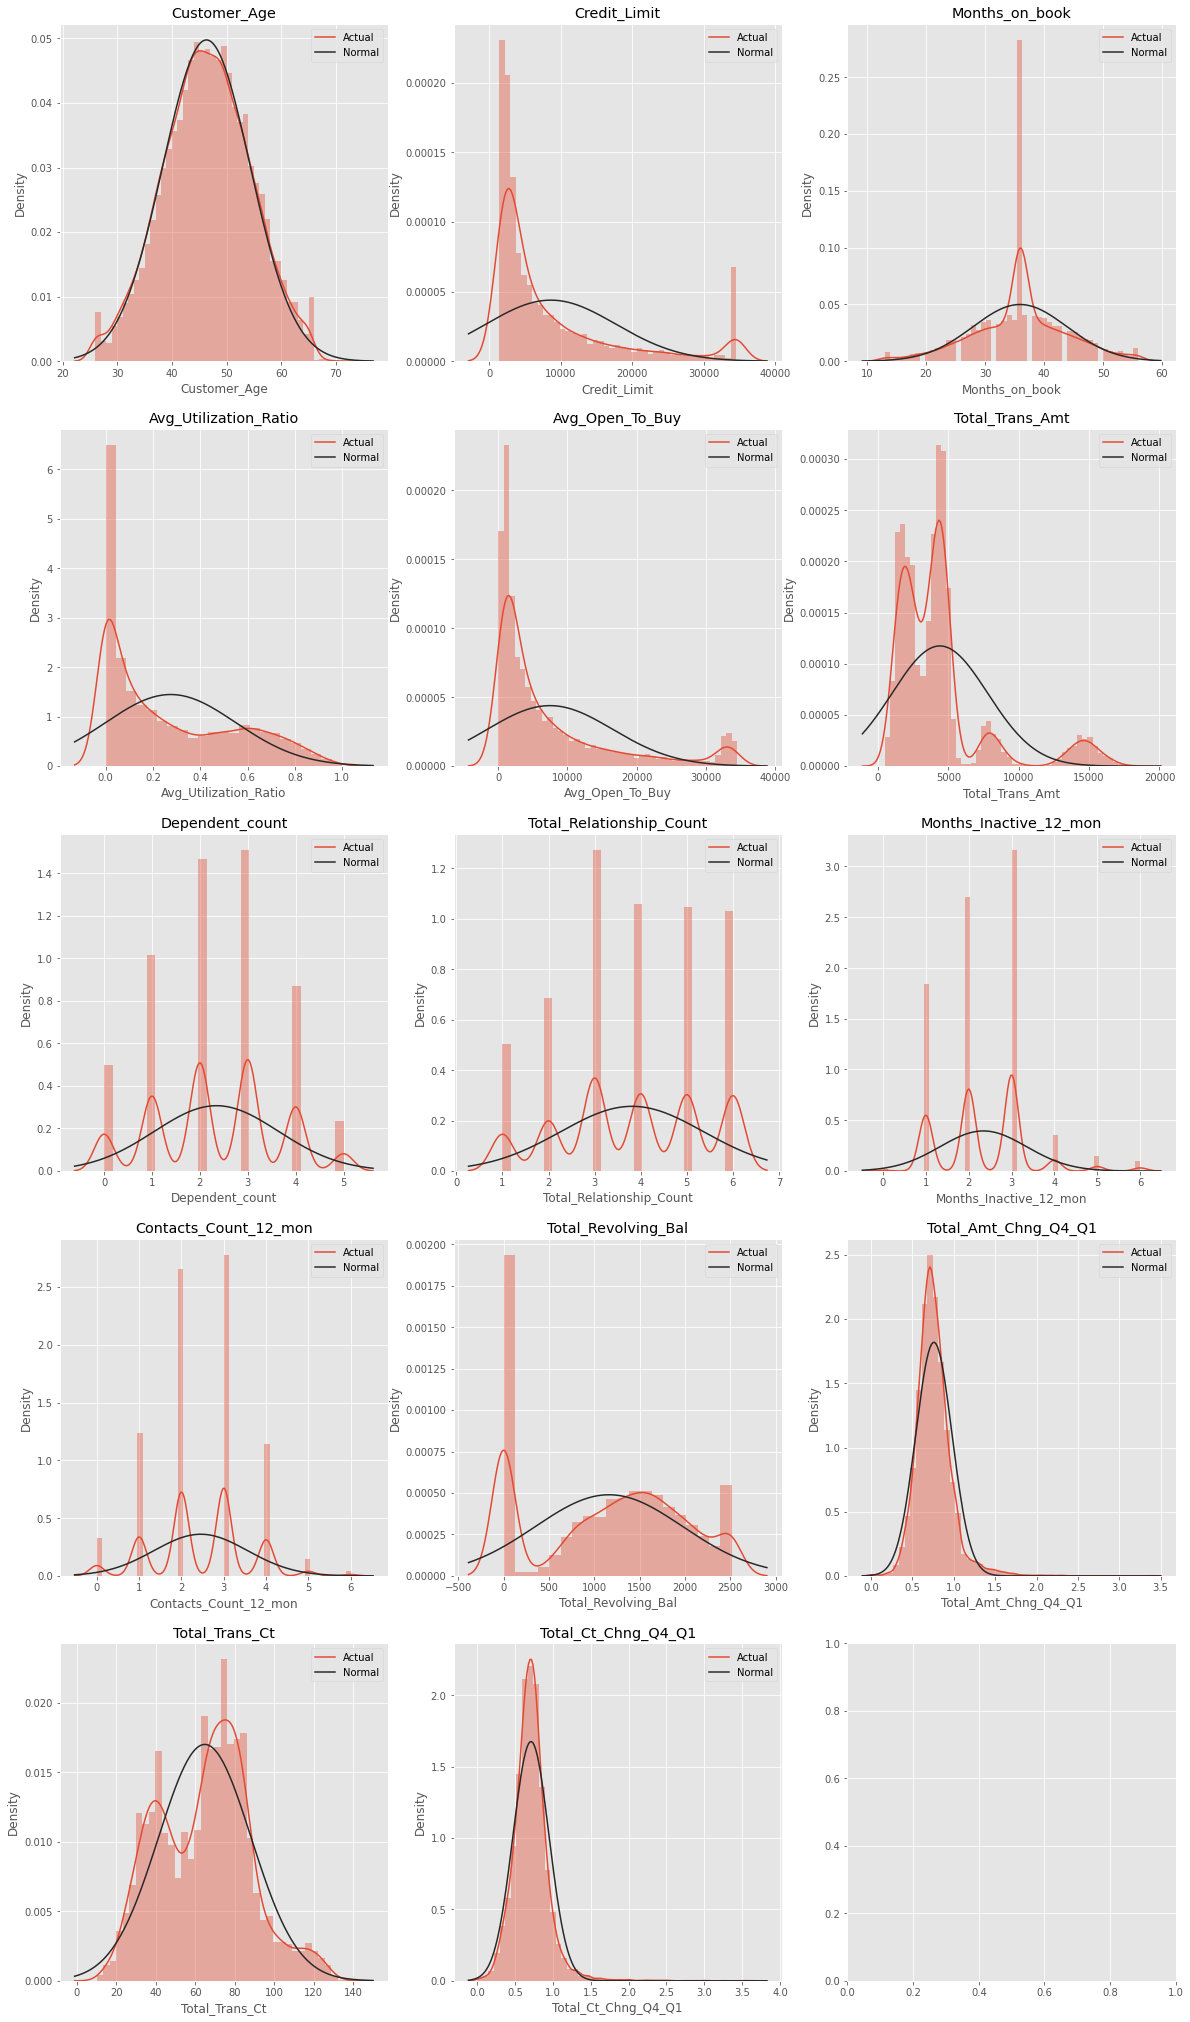

In [8]:
numeric_columns = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt','Dependent_count',
                  'Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal',
                  'Total_Amt_Chng_Q4_Q1','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']

some_columns = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt']


def plotDistPlot(columns):
    fig, ax = plt.subplots(len(columns)//3+1, 3,figsize=(20, 36))
    
    index = 0
    for i in range(5):
        for j in range(3):
            if i*3+(j+1)>len(columns):
                break
            sns.distplot(input_df.loc[:, columns[index]],
                         hist=True,
                         fit=norm,
                         kde=True,
                         ax=ax[i][j])
            ax[i][j].set_title(columns[index])
            ax[i][j].legend(labels=['Actual', 'Normal'])
            index += 1
            
plotDistPlot(numeric_columns)

- `Total_Trans_Ct` has 2 peaks
- `Total_Trans_Amt` can be devided into 4 different groups
- `Avg_Utilization_Ratio`, `Avg_Open_To_Buy` and `Credit_Limit` have similar shape. They may be correlated

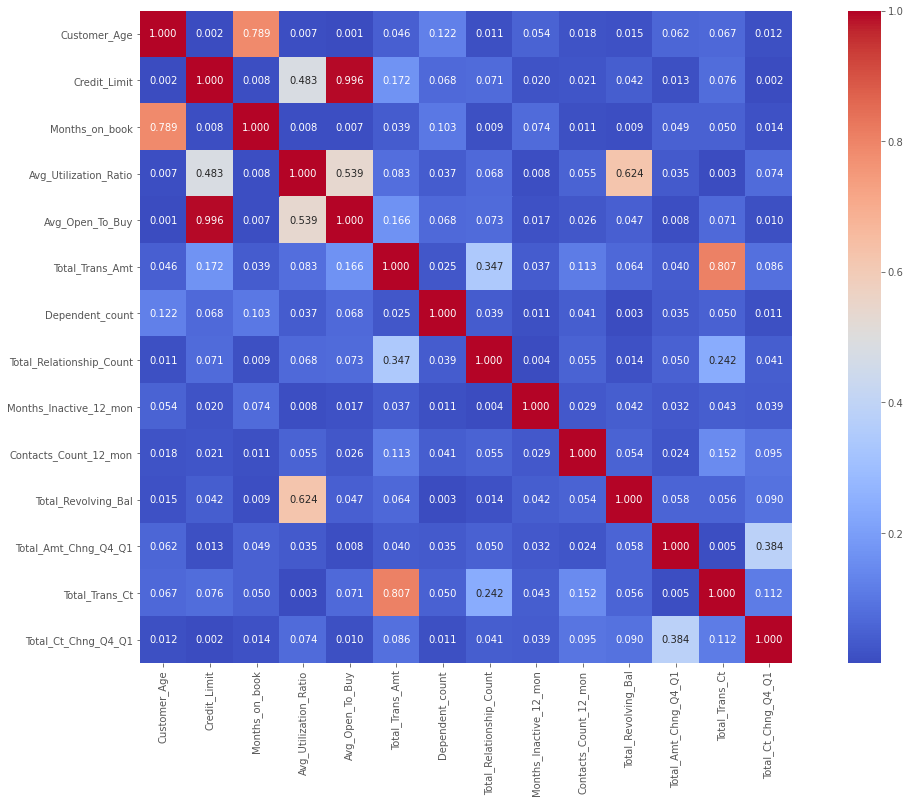

In [9]:
corr_data = input_df.loc[:, numeric_columns].corr()

plt.figure(figsize=(20,12))
sns.heatmap(corr_data.abs(), annot=True, fmt='.3f',cmap='coolwarm',square=True)
plt.show()

Let's plot the most correlated features

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Total_Trans_Ct'>

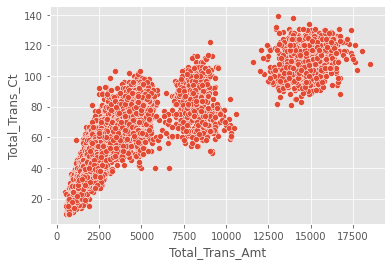

In [10]:
sns.scatterplot(x = input_df['Total_Trans_Amt'], y = input_df['Total_Trans_Ct'])

Looks like log function

[Text(0.5, 0, 'log(Total_Trans_Amt)')]

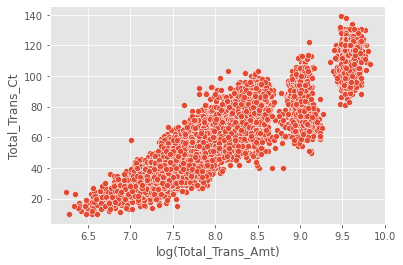

In [11]:
ax = sns.scatterplot(x = input_df['Total_Trans_Amt'].apply(np.log), y = input_df['Total_Trans_Ct'])
ax.set(xlabel='log(Total_Trans_Amt)')

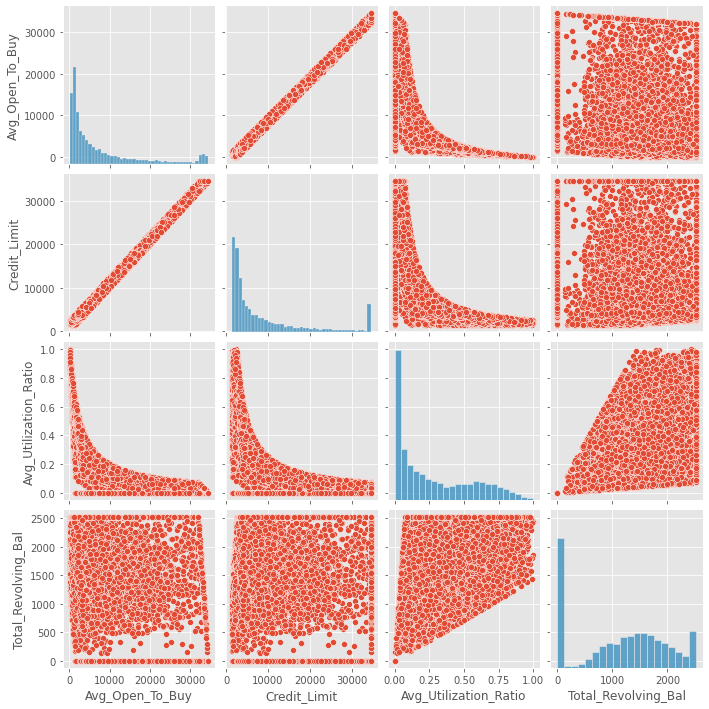

In [12]:
cols = ['Avg_Open_To_Buy', 'Credit_Limit', 'Avg_Utilization_Ratio', 'Total_Revolving_Bal']


sns.pairplot(input_df[cols])

`Credit_Limit` and `Avg_Open_To_Buy` are highly linearly dependent

<AxesSubplot:xlabel='Customer_Age', ylabel='Months_on_book'>

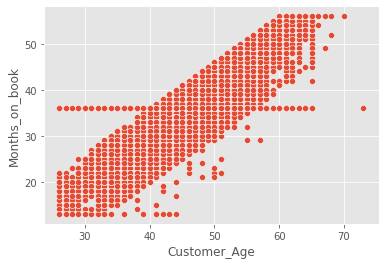

In [13]:
sns.scatterplot(x = input_df['Customer_Age'], y = input_df['Months_on_book'])

Interestingly, the $36$ months on book is spread across all the customers' age. Let's recall a figure from before:

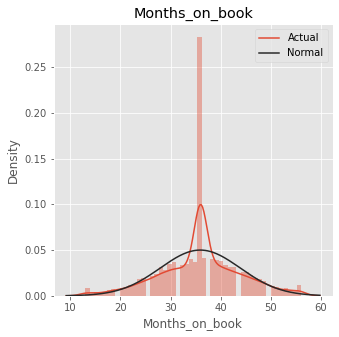

In [34]:
numeric_columns = []

some_columns = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt']


fig, ax = plt.subplots(1, 1, figsize=(5, 5))

index = 0

sns.distplot(input_df.loc[:, 'Months_on_book'],
             hist=True,
             fit=norm,
             kde=True,
             ax=ax)
ax.set_title('Months_on_book')
ax.legend(labels=['Actual', 'Normal'])


$36$ is the most popular amount of months on book. Perhaps those people have some more things in common:
## TODO(Adam - IMO niema nic ciekawego tutaj xd)

In [43]:
common_months_indexes = np.where(input_df['Months_on_book'].to_numpy() == 36)

common_months = input_df.iloc[common_months_indexes]

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


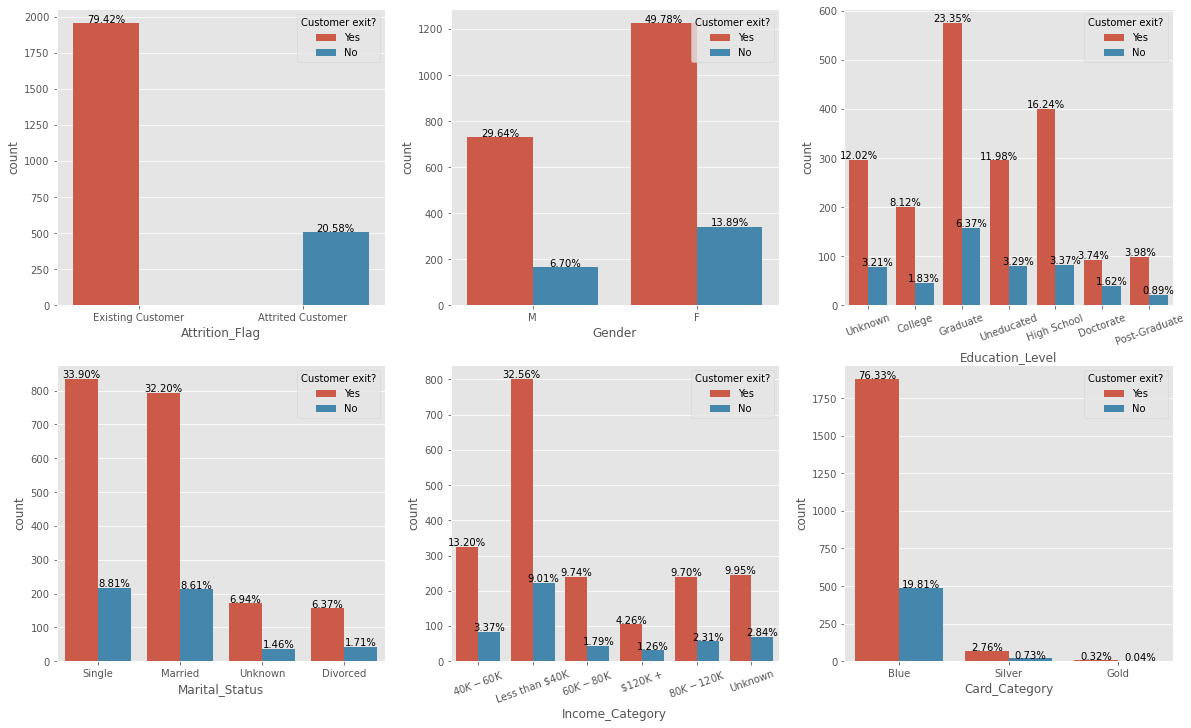

In [46]:
cats = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

def pltCountplotHueTarget(cats, target):
    
    fig, axis = plt.subplots(len(cats) // 3,3, figsize=(20,12))  

    index = 0
    for i in range(len(cats) // 3):
        for j in range(3):
            
            ax = sns.countplot(cats[index], data=common_months, hue=target, ax=axis[i][j])
            
            ax.legend(title='Customer exit?',
                      loc='upper right',
                      labels=['Yes', 'No'])
            
            if cats[index] in ['Education_Level', 'Income_Category']:
                for item in ax.get_xticklabels():
                    item.set_rotation(20)
                
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(common_months)*100),
                        ha="center") 
            index += 1
            
            
pltCountplotHueTarget(cats, 'Attrition_Flag')

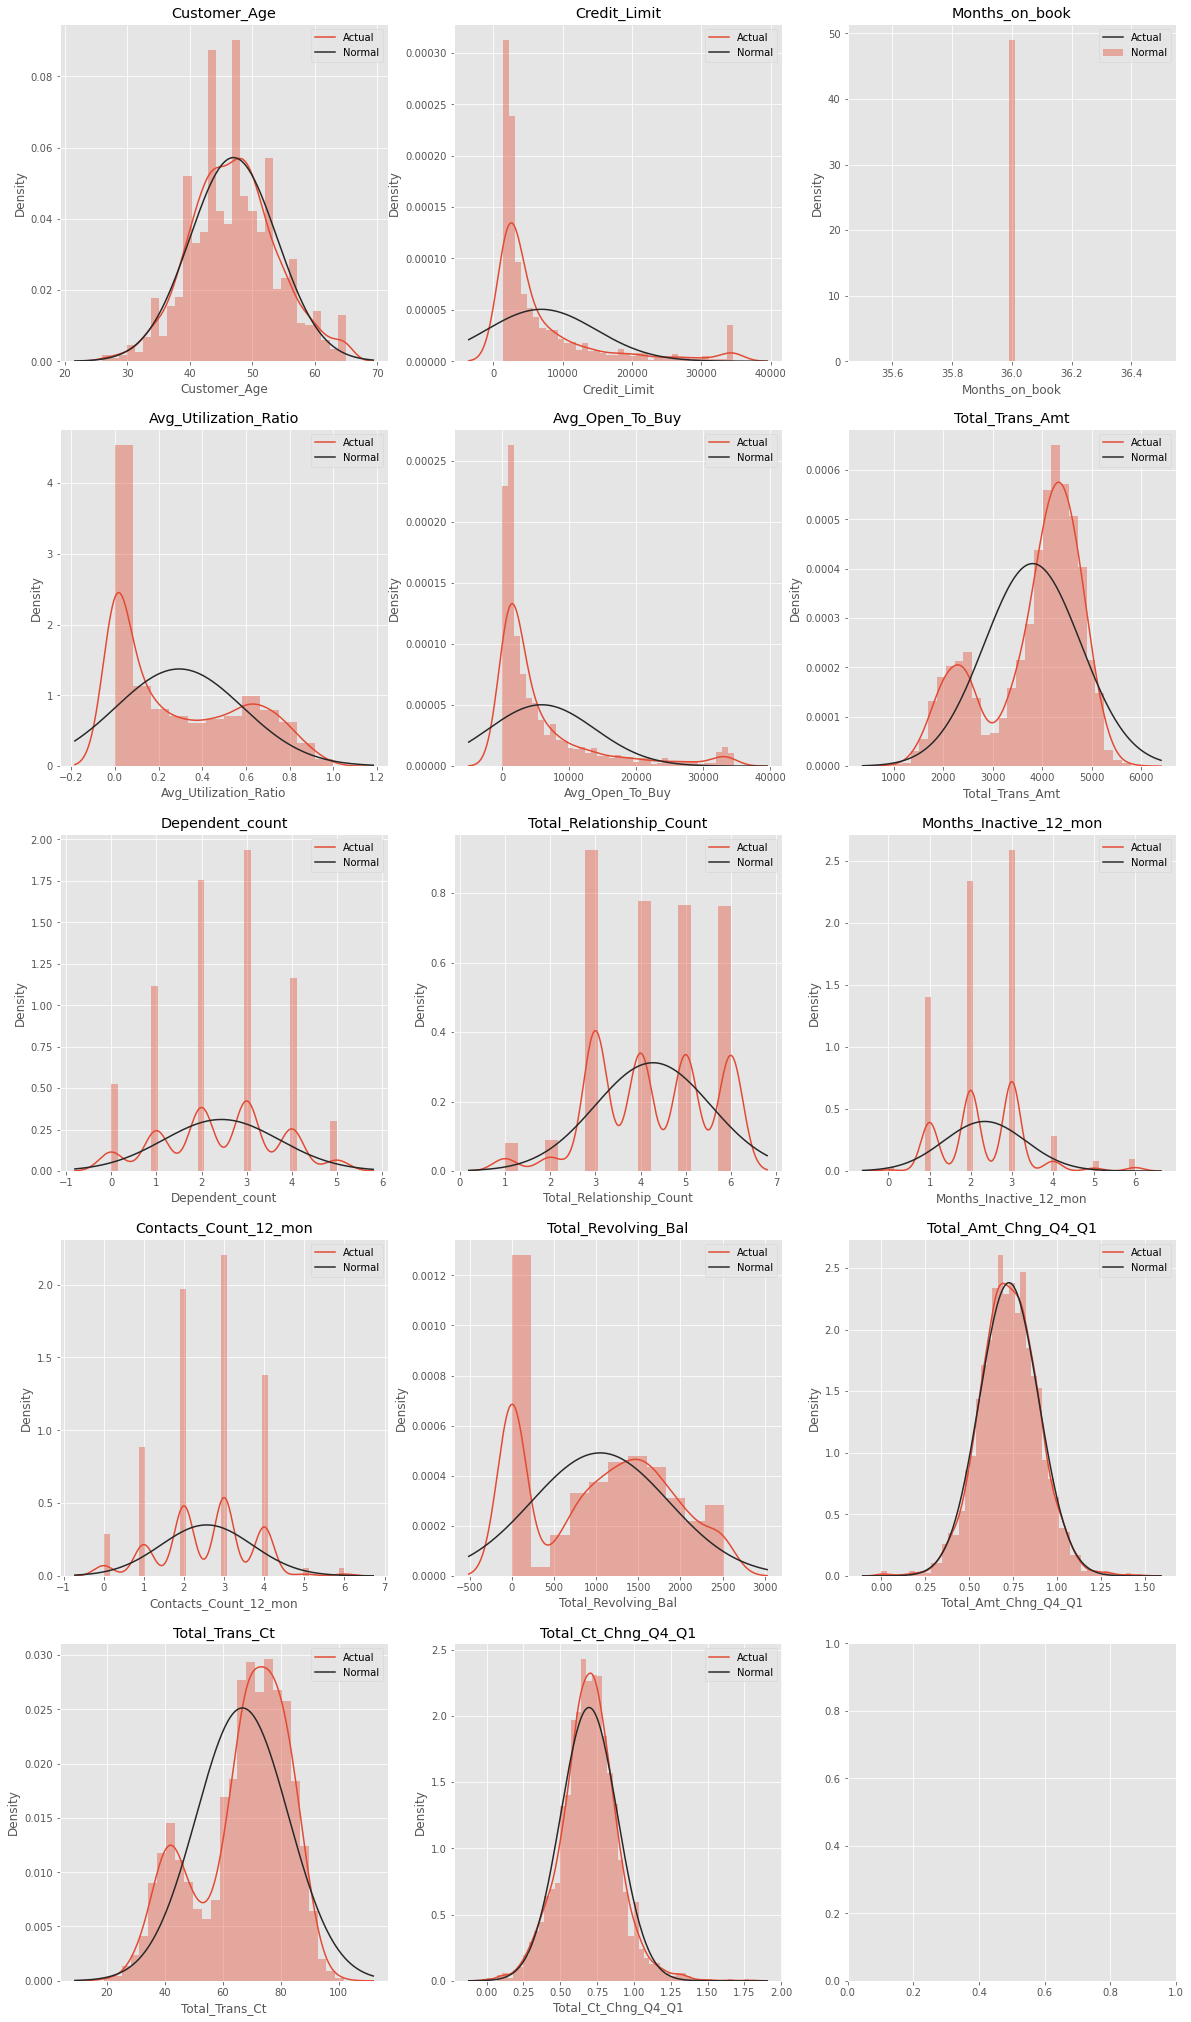

In [45]:
numeric_columns = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt','Dependent_count',
                  'Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal',
                  'Total_Amt_Chng_Q4_Q1','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']

some_columns = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt']


def plotDistPlot(columns):
    fig, ax = plt.subplots(len(columns)//3+1, 3,figsize=(20, 36))
    
    index = 0
    for i in range(5):
        for j in range(3):
            if i*3+(j+1)>len(columns):
                break
            sns.distplot(common_months.loc[:, columns[index]],
                         hist=True,
                         fit=norm,
                         kde=True,
                         ax=ax[i][j])
            ax[i][j].set_title(columns[index])
            ax[i][j].legend(labels=['Actual', 'Normal'])
            index += 1
            
plotDistPlot(numeric_columns)